# Architecture 1: 3 Convolution Layers

# A) 3X3 Kernel

In [1]:
# Major part of thee code here is taken from the ipynb given to us from # Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.p

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
model3_3X3 = Sequential() # 3conv layes, 3x3 kernel

#Conv Layer 1
model3_3X3.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#Conv Layer 2
model3_3X3.add(Conv2D(64, (3, 3), activation='relu'))
model3_3X3.add(MaxPooling2D(pool_size=(2, 2)))
model3_3X3.add(Dropout(0.25))
#Conv Layer  3
model3_3X3.add(Conv2D(64, (3, 3), activation='relu'))
model3_3X3.add(MaxPooling2D(pool_size=(2, 2)))
model3_3X3.add(Dropout(0.25))

# 3D Tensor to vector
model3_3X3.add(Flatten())
model3_3X3.add(Dense(128, activation='relu'))
model3_3X3.add(Dropout(0.5))
model3_3X3.add(Dense(num_classes, activation='softmax'))

In [7]:
model3_3X3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model3_3X3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model3_3X3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 8s 131us/step - loss: 0.2937 - accuracy: 0.9071 - val_loss: 0.0495 - val_accuracy: 0.9835
Epoch 2/12
60000/60000 [==============================] - 6s 104us/step - loss: 0.0916 - accuracy: 0.9730 - val_loss: 0.0331 - val_accuracy: 0.9897
Epoch 3/12
60000/60000 [==============================] - 7s 111us/step - loss: 0.0689 - accuracy: 0.9788 - val_loss: 0.0286 - val_accuracy: 0.9896
Epoch 4/12
60000/60000 [==============================] - 6s 104us/step - loss: 0.0576 - accuracy: 0.9829 - val_loss: 0.0251 - val_accuracy: 0.9909
Epoch 5/12
60000/60000 [==============================] - 6s 107us/step - loss: 0.0510 - accuracy: 0.9849 - val_loss: 0.0247 - val_accuracy: 0.9912
Epoch 6/12
60000/60000 [==============================] - 6s 104us/step - loss: 0.0451 - accuracy: 0.9867 - val_loss: 0.0217 - val_accuracy: 0.9923
Epoch 7/12
60000/60000 [==============================] - 7s 1

<IPython.core.display.Javascript object>


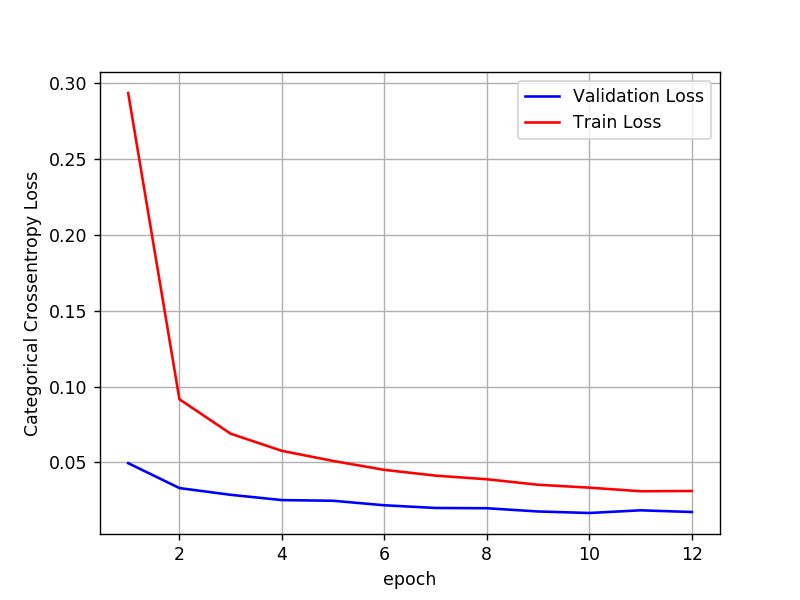

In [8]:
#score = model3_3X3.evaluate(x_test, y_test, verbose=0) 
#print('Test score:', score[0]) 
#print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# B) 5X5 Kernel

In [9]:
model3_5X5 = Sequential() # 3conv layes, 5x5 kernel

#Conv Layer 1
model3_5X5.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
#Conv Layer 2
model3_5X5.add(Conv2D(64, (5, 5), activation='relu'))
model3_5X5.add(MaxPooling2D(pool_size=(2, 2)))
model3_5X5.add(Dropout(0.25))
#Conv Layer  3
model3_5X5.add(Conv2D(128, (5, 5), activation='relu'))
model3_5X5.add(MaxPooling2D(pool_size=(2, 2)))
model3_5X5.add(Dropout(0.25))

# 3D Tensor to vector
model3_5X5.add(Flatten())
model3_5X5.add(Dense(128, activation='relu'))
model3_5X5.add(Dropout(0.5))
model3_5X5.add(Dense(num_classes, activation='softmax'))

In [10]:
model3_5X5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model3_5X5.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model3_5X5.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 8s 139us/step - loss: 0.2633 - accuracy: 0.9177 - val_loss: 0.0467 - val_accuracy: 0.9851
Epoch 2/12
60000/60000 [==============================] - 7s 124us/step - loss: 0.0732 - accuracy: 0.9783 - val_loss: 0.0316 - val_accuracy: 0.9904
Epoch 3/12
60000/60000 [==============================] - 7s 117us/step - loss: 0.0532 - accuracy: 0.9844 - val_loss: 0.0222 - val_accuracy: 0.9929
Epoch 4/12
60000/60000 [==============================] - 7s 116us/step - loss: 0.0431 - accuracy: 0.9874 - val_loss: 0.0217 - val_accuracy: 0.9932
Epoch 5/12
60000/60000 [==============================] - 7s 117us/step - loss: 0.0366 - accuracy: 0.9895 - val_loss: 0.0169 - val_accuracy: 0.9944
Epoch 6/12
60000/60000 [==============================] - 8s 131us/step - loss: 0.0311 - accuracy: 0.9905 - val_loss: 0.0196 - val_accuracy: 0.9947
Epoch 7/12
60000/60000 [==============================] - 8s 1

<IPython.core.display.Javascript object>


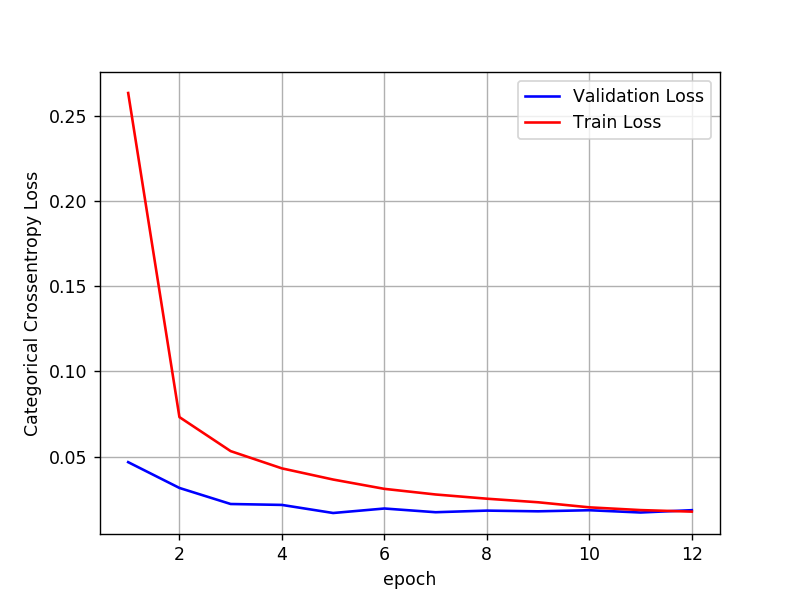

In [11]:
#score = model3_3X3.evaluate(x_test, y_test, verbose=0) 
#print('Test score:', score[0]) 
#print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# C) 2X2 Kernel

In [12]:
model3_2X2 = Sequential() # 3conv layes, 2x2 kernel

#Conv Layer 1
model3_2X2.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#Conv Layer 2
model3_2X2.add(Conv2D(64, (3, 3), activation='relu'))
model3_2X2.add(MaxPooling2D(pool_size=(2, 2)))
model3_2X2.add(Dropout(0.25))
#Conv Layer  3
model3_2X2.add(Conv2D(64, (3, 3), activation='relu'))
model3_2X2.add(MaxPooling2D(pool_size=(2, 2)))
model3_2X2.add(Dropout(0.25))

# 3D Tensor to vector
model3_2X2.add(Flatten())
model3_2X2.add(Dense(128, activation='relu'))
model3_2X2.add(Dropout(0.5))
model3_2X2.add(Dense(num_classes, activation='softmax'))

In [13]:
model3_2X2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model3_2X2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model3_2X2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 116us/step - loss: 0.2891 - accuracy: 0.9088 - val_loss: 0.0515 - val_accuracy: 0.9839
Epoch 2/12
60000/60000 [==============================] - 6s 107us/step - loss: 0.0928 - accuracy: 0.9725 - val_loss: 0.0361 - val_accuracy: 0.9888
Epoch 3/12
60000/60000 [==============================] - 7s 108us/step - loss: 0.0691 - accuracy: 0.9795 - val_loss: 0.0336 - val_accuracy: 0.9886
Epoch 4/12
60000/60000 [==============================] - 6s 104us/step - loss: 0.0568 - accuracy: 0.9833 - val_loss: 0.0241 - val_accuracy: 0.9921
Epoch 5/12
60000/60000 [==============================] - 7s 109us/step - loss: 0.0523 - accuracy: 0.9842 - val_loss: 0.0245 - val_accuracy: 0.9915
Epoch 6/12
60000/60000 [==============================] - 6s 105us/step - loss: 0.0468 - accuracy: 0.9863 - val_loss: 0.0232 - val_accuracy: 0.9925
Epoch 7/12
60000/60000 [==============================] - 6s 1

<IPython.core.display.Javascript object>


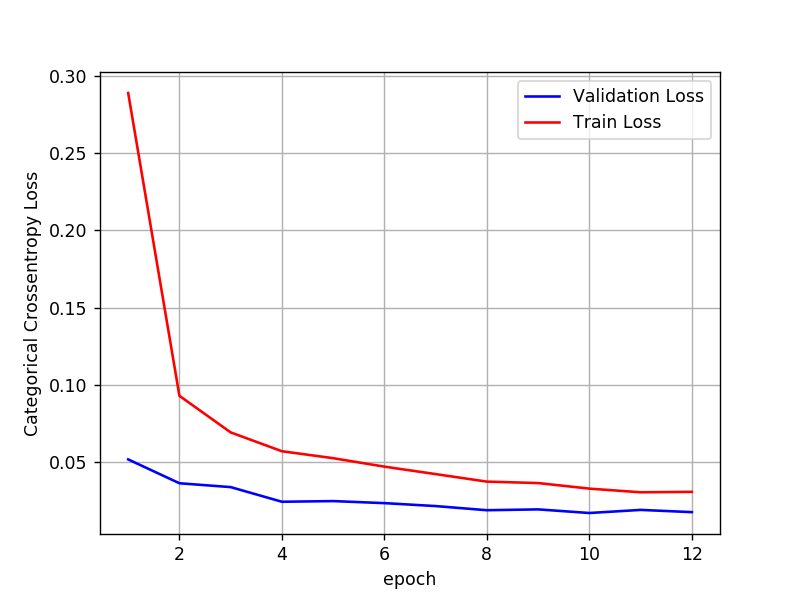

In [14]:
#score = model3_3X3.evaluate(x_test, y_test, verbose=0) 
#print('Test score:', score[0]) 
#print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Architecture 2: 5 Convolution Layers

In [15]:
model = Sequential() 

#Conv Layer 1
model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
#Conv Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Conv Layer  3
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Conv Layer  4
model.add(Conv2D(128, (5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Conv Layer  5
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3D Tensor to vector
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [16]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 18s 297us/step - loss: 0.3290 - accuracy: 0.8957 - val_loss: 0.0399 - val_accuracy: 0.9877
Epoch 2/12
60000/60000 [==============================] - 17s 280us/step - loss: 0.0708 - accuracy: 0.9811 - val_loss: 0.0320 - val_accuracy: 0.9897
Epoch 3/12
60000/60000 [==============================] - 17s 279us/step - loss: 0.0508 - accuracy: 0.9872 - val_loss: 0.0253 - val_accuracy: 0.9921
Epoch 4/12
60000/60000 [==============================] - 17s 285us/step - loss: 0.0375 - accuracy: 0.9896 - val_loss: 0.0344 - val_accuracy: 0.9888
Epoch 5/12
60000/60000 [==============================] - 18s 293us/step - loss: 0.0337 - accuracy: 0.9908 - val_loss: 0.0219 - val_accuracy: 0.9935
Epoch 6/12
60000/60000 [==============================] - 18s 296us/step - loss: 0.0274 - accuracy: 0.9926 - val_loss: 0.0238 - val_accuracy: 0.9929
Epoch 7/12
60000/60000 [==============================] 

<IPython.core.display.Javascript object>


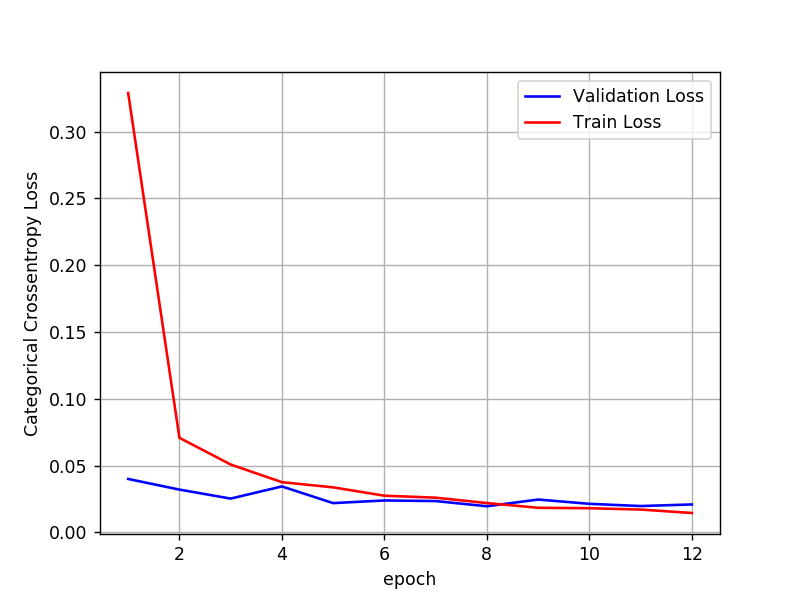

In [17]:
#score = model3_3X3.evaluate(x_test, y_test, verbose=0) 
#print('Test score:', score[0]) 
#print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Architecture 3: 7 Convolution Layers

In [18]:
Model = Sequential() 

#Conv Layer 1
Model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
#Conv Layer 2
Model.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
Model.add(Dropout(0.25))

#Conv Layer  3
Model.add(Conv2D(64, (5, 5), activation='relu'))
Model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

#Conv Layer  4
Model.add(Conv2D(64, (5, 5), activation='relu',padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

#Conv Layer  5
Model.add(Conv2D(64, (5, 5), activation='relu'))
#Model.add(MaxPooling2D(pool_size=(2, 2)))
Model.add(Dropout(0.25))

#Conv Layer  6
Model.add(Conv2D(128, (5, 5), activation='relu',padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Conv Layer  7
Model.add(Conv2D(128, (5, 5), activation='relu'))
Model.add(MaxPooling2D(pool_size=(2, 2)))
Model.add(Dropout(0.25))

# 3D Tensor to vector
Model.add(Flatten())
Model.add(Dense(128, activation='relu'))
Model.add(Dropout(0.5))
Model.add(Dense(num_classes, activation='softmax'))

In [19]:
Model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=Model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = Model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 14s 227us/step - loss: 0.4438 - accuracy: 0.8570 - val_loss: 0.0648 - val_accuracy: 0.9801
Epoch 2/12
60000/60000 [==============================] - 13s 213us/step - loss: 0.0658 - accuracy: 0.9830 - val_loss: 0.0278 - val_accuracy: 0.9926
Epoch 3/12
60000/60000 [==============================] - 13s 214us/step - loss: 0.0443 - accuracy: 0.9896 - val_loss: 0.0334 - val_accuracy: 0.9903
Epoch 4/12
60000/60000 [==============================] - 12s 201us/step - loss: 0.0360 - accuracy: 0.9910 - val_loss: 0.0239 - val_accuracy: 0.9929
Epoch 5/12
60000/60000 [==============================] - 12s 205us/step - loss: 0.0281 - accuracy: 0.9925 - val_loss: 0.0385 - val_accuracy: 0.9907
Epoch 6/12
60000/60000 [==============================] - 12s 207us/step - loss: 0.0236 - accuracy: 0.9937 - val_loss: 0.0234 - val_accuracy: 0.9943
Epoch 7/12
60000/60000 [==============================] 

<IPython.core.display.Javascript object>


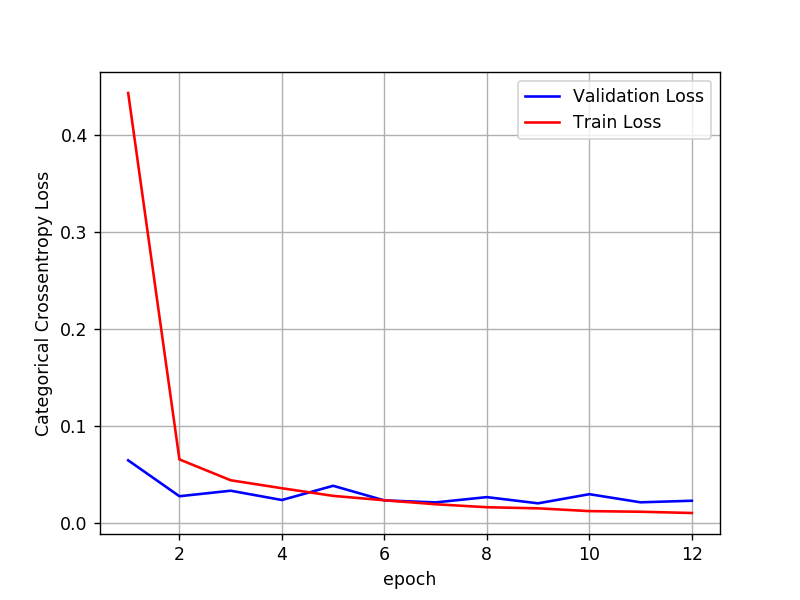

In [20]:
#score = model3_3X3.evaluate(x_test, y_test, verbose=0) 
#print('Test score:', score[0]) 
#print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)